In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [58]:
from superflexpy.implementation.root_finders.pegasus import PegasusPython
from superflexpy.implementation.numerical_approximators.implicit_euler import ImplicitEulerPython
from superflexpy.implementation.elements.hbv import PowerReservoir
from superflexpy.framework.unit import Unit

# Initialize numercal routines
root_finder = PegasusPython(iter_max=500)
numeric_approximator = ImplicitEulerPython(root_finder=root_finder)

# Initialize the elements
pr_1 = PowerReservoir(
    parameters={'k': 1., 'alpha': 0.5},
    states={'S0': 100.0},
    approximation=numeric_approximator,
    id='PR-1'
)

pr_2 = PowerReservoir(
    parameters={'k': 0.01, 'alpha': 2.0},
    states={'S0': 1.0},
    approximation=numeric_approximator,
    id='PR-2'
)

# Initialize the Unit
model = Unit(
    layers=[
        [pr_1],
        [pr_2]
    ],
    id='model'
)

In [59]:
# Fix the seed
SEED = 2
rng = np.random.RandomState(seed=SEED)

P = np.zeros(100)
P[:10] = rng.randint(10, size=10)
P[25:30] = rng.randint(20, size=5)
P[40:60] = rng.randint(5, size=20)
P[80:83] = rng.randint(30, 50, size=3)
P[0] = 0

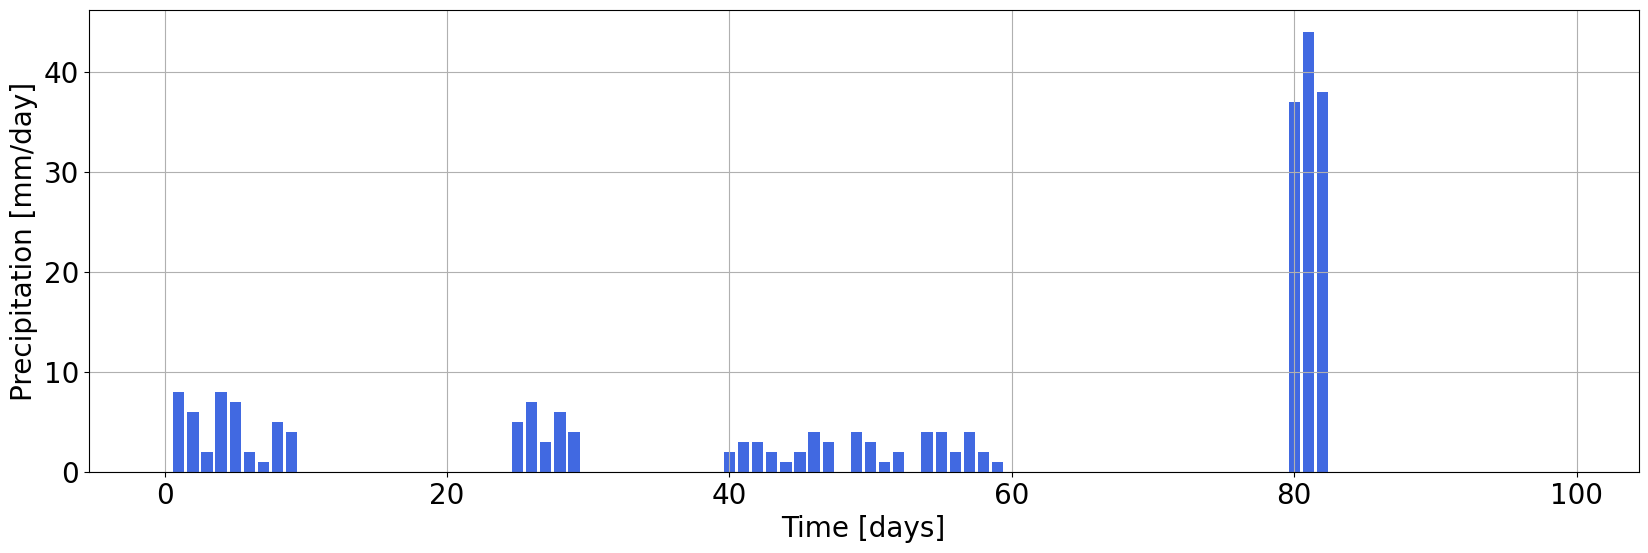

In [60]:
# Plot

fig1, ax1 = plt.subplots(1, 1, figsize=(20, 6))
ax1.bar(x=np.arange(len(P)), height=P, color='royalblue')
ax1.set_xlabel('Time [days]')
ax1.set_ylabel('Precipitation [mm/day]')
ax1.grid(True)
pass

In [61]:
model.set_input([P])
model.set_timestep(1.0)
output = model.get_output()


c:\Users\paoliniart\AppData\Local\miniconda3\envs\envsuperflex\Lib\site-packages\superflexpy\implementation\elements\hbv.py:142: RuntimeWarning: divide by zero encountered in scalar power
  - k[ind] * alpha[ind] * S**(alpha[ind] - 1)


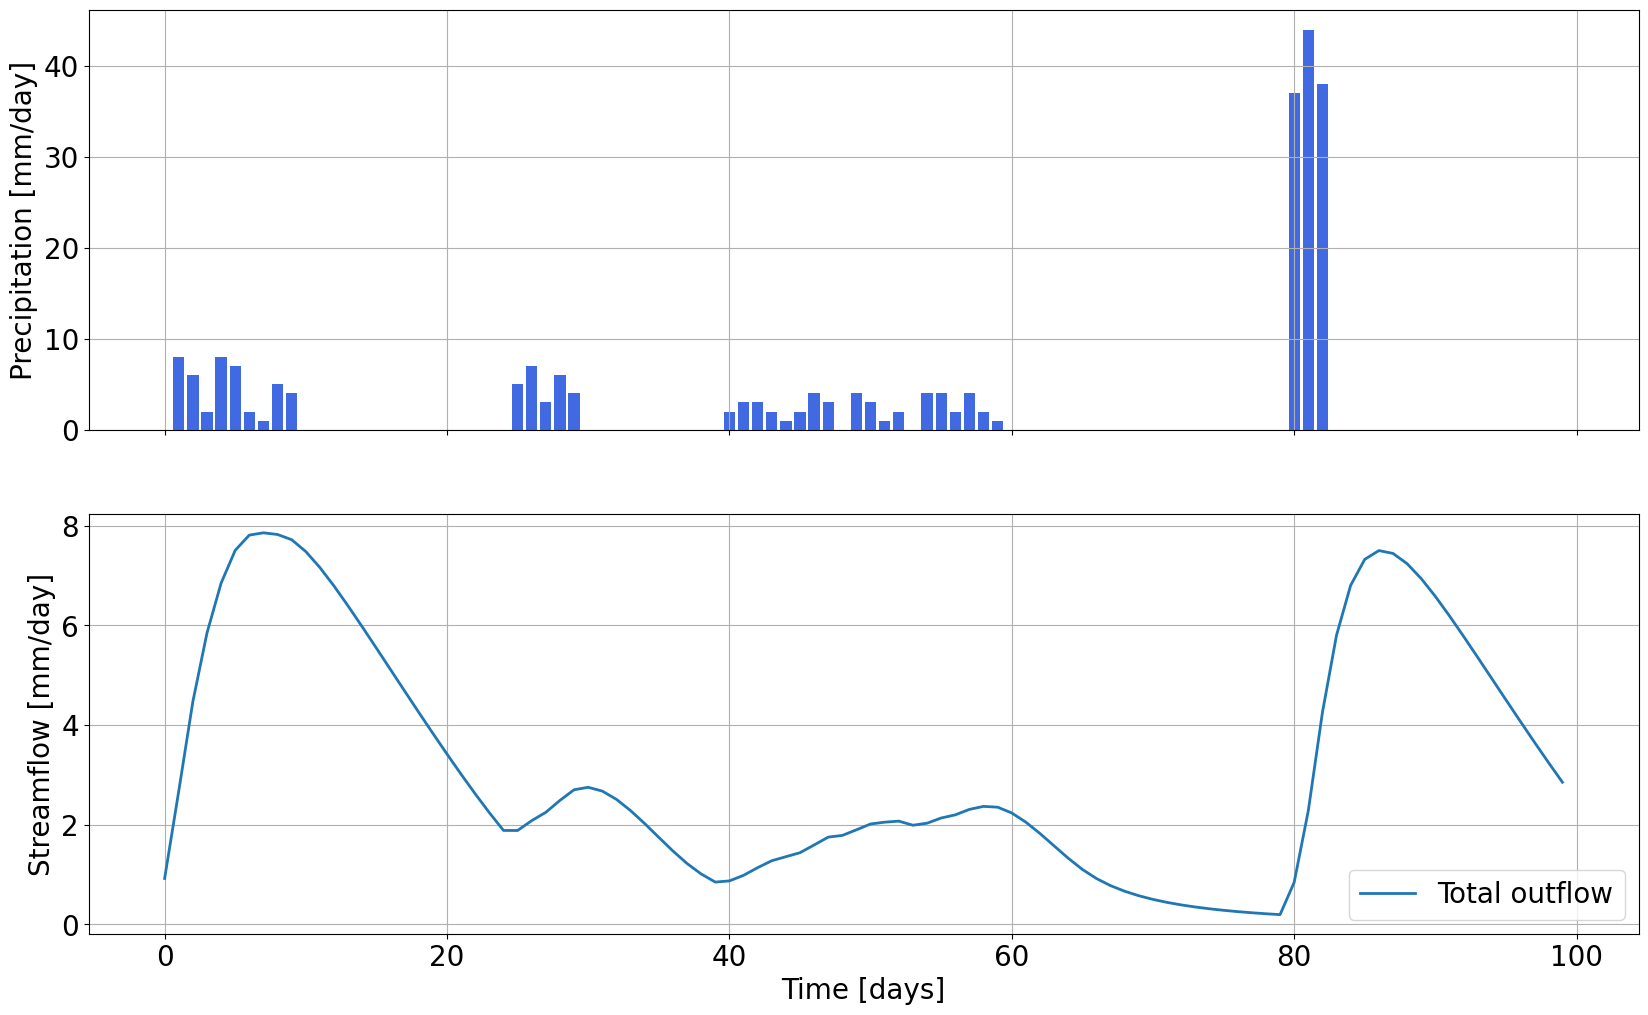

In [62]:
# Plot

fig2, ax2 = plt.subplots(2, 1, figsize=(20, 12), sharex=True)
ax2[0].bar(x=np.arange(len(P)), height=P, color='royalblue')
ax2[0].set_ylabel('Precipitation [mm/day]')
ax2[0].grid(True)
ax2[1].plot(np.arange(len(P)), output[0], lw=2, label='Total outflow')
ax2[1].set_xlabel('Time [days]')
ax2[1].set_ylabel('Streamflow [mm/day]')
ax2[1].legend()
ax2[1].grid(True)
pass

In [63]:
output_upstream = model.call_internal(id='PR-1', method='get_output', solve=False)
state_upstream = model.get_internal(id='PR-1', attribute='state_array')
state_downstream = model.get_internal(id='PR-2', attribute='state_array')

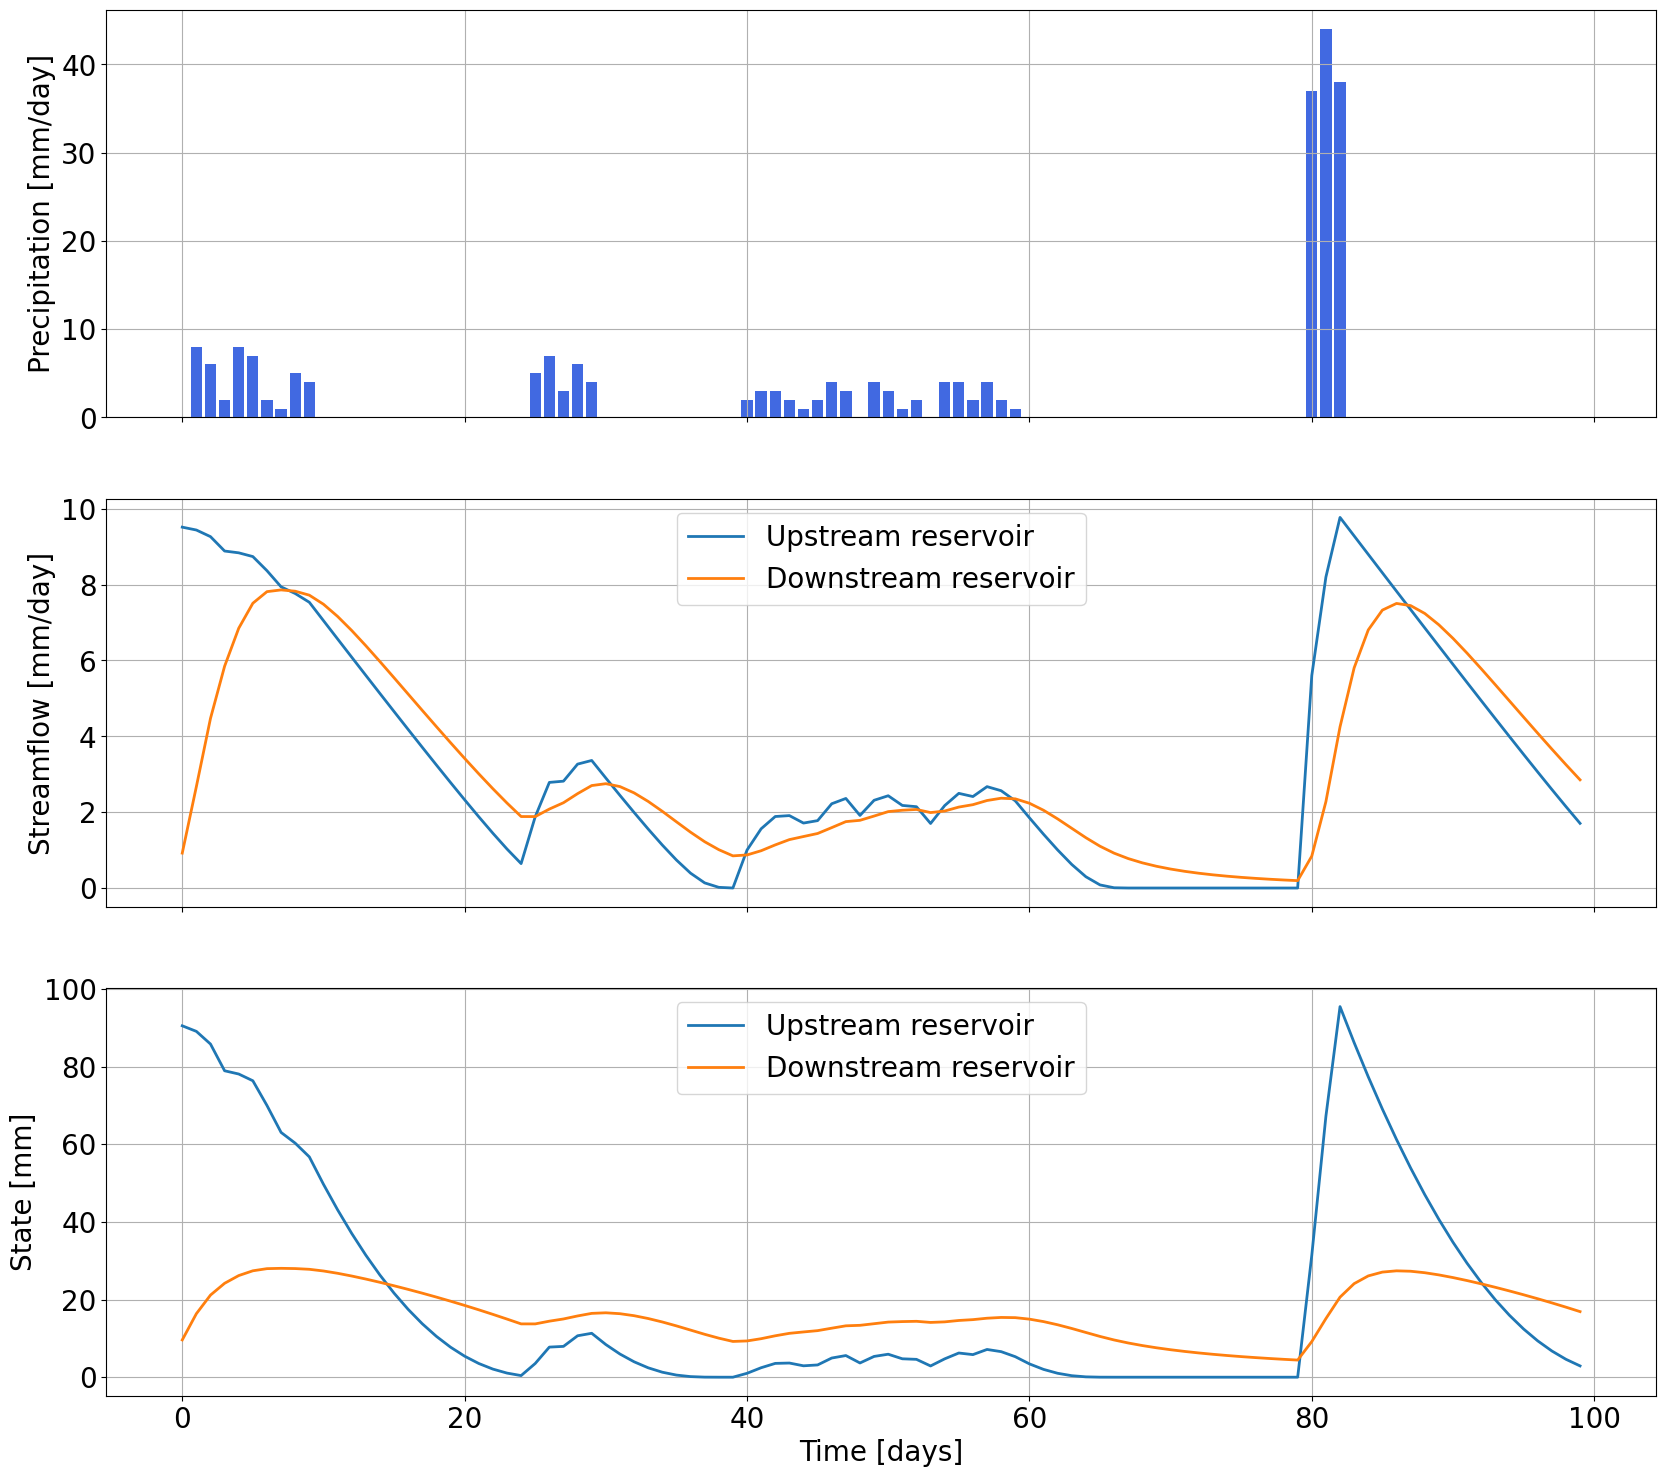

In [64]:
# Plot

fig3, ax3 = plt.subplots(3, 1, figsize=(20, 18), sharex=True)
ax3[0].bar(x=np.arange(len(P)), height=P, color='royalblue')
ax3[0].set_ylabel('Precipitation [mm/day]')
ax3[0].grid(True)
ax3[1].plot(np.arange(len(P)), output_upstream[0], lw=2, label='Upstream reservoir')
ax3[1].plot(np.arange(len(P)), output[0], lw=2, label='Downstream reservoir')
ax3[1].set_ylabel('Streamflow [mm/day]')
ax3[1].legend()
ax3[1].grid(True)
ax3[2].plot(np.arange(len(P)), state_upstream, lw=2, label='Upstream reservoir')
ax3[2].plot(np.arange(len(P)), state_downstream, lw=2, label='Downstream reservoir')
ax3[2].set_xlabel('Time [days]')
ax3[2].set_ylabel('State [mm]')
ax3[2].legend()
ax3[2].grid(True)
pass